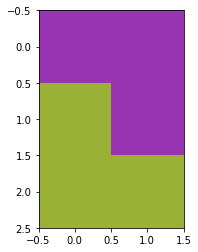

In [3]:
#Importing some necessary programs 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import random as rd
import numpy as np
    #this has "choice(list)" and "random" for a number [0,1)
    
#This is a sample of how colors will be displayed
a = col.hsv_to_rgb((0.8, 0.7, 0.7))
b = col.hsv_to_rgb((0.2, 0.7, 0.7))
#colors are defined by their hue, saturation, value codes, then converted to rgb for display
#the display is done via "plt.imshow" where the parameters are set as follows
    #imshow ((color info)) 
    #imshow (([highest row],...,[lowest row]))
    #imshow(([left column,...,right column],...,[left column, right column]))
plt.imshow(([a,a], [b,a], [b,b])) #this is an example where b is greenish and a is purple


In [130]:
def gen_eye_imag():
    color = [rd.random(), rd.random(), rd.random()]
    color2 = [color[0], color[1], color[2]]
    variation = rd.choice(['none', 'slight', 'moderate', 'heavy'])
    if variation == 'slight':
        for i in range(len(color2)):
            color2[i] += (0.2 * rd.random())-0.1
    elif variation == 'moderate':
        for i in range(len(color2)):
            color2[i] += (0.5 * rd.random())-0.25
    elif variation == 'heavy':
        for i in range(len(color2)):
            color2[i] += (0.6 * rd.random())-0.3
    elif variation == 'none':
        block = []
        for i in range(8):
            block.append([color for x in range(8)])
        return block
    for num in range(3): #correct for case of too much variance
        if color[num] > 1:
            color[num] = 1
        elif color[num]<0:
            color[num]=0
        if color2[num] > 1:
            color2[num] = 1
        elif color2[num]<0:
            color2[num]=0
    #now two colors have been generated, a base ('color') and accent ('color2')
    #the next step is to decide on a display pattern
    pattern = rd.choice(['scramble', 'thick ring', 'inner ring', 'outer ring'])
    block = []
    if pattern == 'scramble':
        for i in range(8):
            strand = [color for x in range(8)]
            strand[int(round(rd.random()*7, 0))] = color2
            block.append(strand)
    elif pattern == 'thick ring':
        topper = [color2 for x in range(8)]
        edge = [color2 for x in range(2)] + [color for x in range(4)] + [color2 for x in range(2)]
        block = [topper, topper, edge, edge, edge, edge, topper, topper]
    elif pattern == 'outer ring':
        topper = [color2 for x in range(8)]
        edge = [color2] + [color for x in range(6)] + [color2]
        block = [topper, edge, edge, edge, edge, edge, edge, topper]
    elif pattern == 'inner ring':
        topper = [color for x in range(8)]
        second = [color] + [color2 for x in range(6)] + [color]
        edge = [color, color2] + [color for x in range(4)] + [color2, color]
        block = [topper, second, edge, edge, edge, edge, second, topper]
    return block

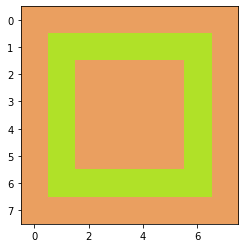

In [136]:
plt.imshow(gen_eye_imag())